# B. Supervised Learning (SL) - Classification (5 points) Problem
In this exercise (B) you are requested to create two artificially generated datasets (as detailed below)
and to use the scikit-learn library to visualize the decision boundaries of k-NN, Naive Bayes, Decision
Trees, and Random Forests. Even if it was not discussed during the lectures, please feel free to add also
a Support Vector Machine and an Artificial Neural Network classifier.

# Requirements
• Please solve each of the following subproblems and give clear explanations for your solutions.
• For this exercise (B), you do not have to implement the machine learning models from scratch.
Some hints: try to use the scikit-learn library; this tutorial
https://scikit-learn.org/stable/auto examples/classification/plot classifier comparison.html
can be used as a guideline to solve this exercise.

# B.I. Classification models comparison (5 points)

1. (0.5 points) Dataset 1 creation. The dataset shall represent a binary classification problem and
shall have as input two continuous real number attributes. The dataset shall have 40 data points
belonging to one class and 40 data points belonging to the other class. Discuss your approach and
report the data points obtained in the report.

In [1]:
#import libraries
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This is for reproducibility
np.random.seed(42)

In [4]:
#Dataset_1
x_Dataset_1, y_Dataset_1 = make_classification(n_samples=80, n_features=2, n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, flip_y=0, class_sep=2.0, weights=[0.5, 0.5], random_state=1)

In [5]:
# dataframe for holding attributes and labels
dataset_1 = pd.DataFrame(x_Dataset_1, columns=['Attribute_1', 'Attribute_2'])
dataset_1['Labels'] = y_Dataset_1

In [6]:
# Show Dataset_1
print(dataset_1)

    Attribute_1  Attribute_2  Labels
0     -0.492733     2.500029       1
1      2.955888     1.514375       0
2      2.539261     1.968872       0
3      0.728628     2.722979       0
4     -1.345961     2.770918       1
..          ...          ...     ...
75     3.000371     1.178582       0
76    -2.798383     1.152721       1
77    -3.339362     0.879628       1
78    -2.212153     1.463925       1
79    -2.202014     2.150311       1

[80 rows x 3 columns]


In [7]:
dataset_1

,Attribute_1,Attribute_2,Labels
0,-0.492733,2.500029,1
1,2.955888,1.514375,0
2,2.539261,1.968872,0
3,0.728628,2.722979,0
4,-1.345961,2.770918,1
...,...,...,...
75,3.000371,1.178582,0
76,-2.798383,1.152721,1
77,-3.339362,0.879628,1
78,-2.212153,1.463925,1


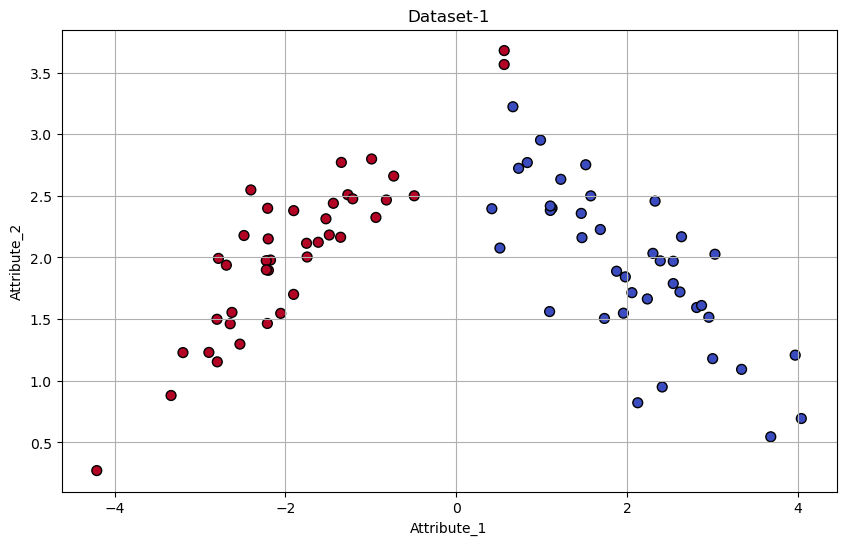

In [8]:
# Plotting Dataset_1
plt.figure(figsize=(10, 6))
plt.scatter(dataset_1['Attribute_1'], dataset_1['Attribute_2'], c=dataset_1['Labels'], cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.title("Dataset-1")
plt.xlabel("Attribute_1")
plt.ylabel("Attribute_2")
plt.grid(True)
plt.show()

# -----------------------------------------------------------------------------------------------------------

2. (0.5 points) Dataset 2 creation (Dataset 1 + outliers). Add randomly to Dataset 1, four outliers for
each class. Discuss your approach and report the data points, including the outliers in the report.

In [9]:
#define a function to added outliers
def add_outliers(data, num_outliers=4):
    new_data = data.copy()
    features = data.columns[:-1]
    stats = data.describe()
    outliers_list = []
    for cls in new_data['Labels'].unique():
        class_mean = stats.loc['mean', features]
        class_std = stats.loc['std', features]
        if cls == 0:
            outlier_mean = class_mean - class_std * 3
        else:
            outlier_mean = class_mean + class_std * 3
        for _ in range(num_outliers):
            outlier = outlier_mean + np.random.randn(2) * class_std
            outlier_data = np.append(outlier, cls)
            outliers_list.append(outlier_data)
    outlier_df = pd.DataFrame(outliers_list, columns=new_data.columns)
    new_data = pd.concat([new_data, outlier_df], ignore_index=True)
    return new_data

In [10]:
# Added 4 outliers to dataset
dataset_2 = add_outliers(dataset_1)

In [12]:
#show datasets_2
dataset_2

,Attribute_1,Attribute_2,Labels
0,-0.492733,2.500029,1.0
1,2.955888,1.514375,0.0
2,2.539261,1.968872,0.0
3,0.728628,2.722979,0.0
4,-1.345961,2.770918,1.0
...,...,...,...
83,10.097862,4.412520,1.0
84,-7.551081,0.399795,0.0
85,-7.537800,-0.250176,0.0
86,-5.991062,-1.183307,0.0


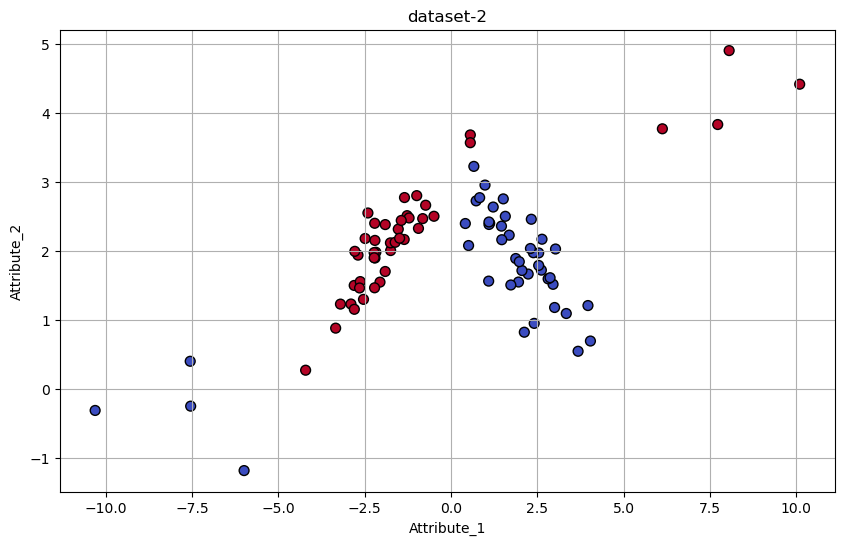

In [13]:
# Plotting dataset-2
plt.figure(figsize=(10, 6))
plt.scatter(dataset_2['Attribute_1'], dataset_2['Attribute_2'], c=dataset_2['Labels'],
            cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.title("dataset-2")
plt.xlabel("Attribute_1")
plt.ylabel("Attribute_2")
plt.grid(True)
plt.show()


# -----------------------------------------------------------------------------------------------------------

3. (0.5 points) Split Dataset 1 and Dataset 2 in training and testing data. Justify your choices for
splitting the data and report the split data.

In [14]:
#import libraries
from sklearn.model_selection import train_test_split

In [15]:
# Split Dataset-1
x_1 = dataset_1.drop('Labels', axis=1)
y_1 = dataset_1['Labels']
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.3, random_state=42)

In [18]:
# spilt dataset-2
x_2 = dataset_2.drop('Labels', axis=1)
y_2 = dataset_2['Labels']
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.3, random_state=42)

In [19]:
# information about the datasets that are splited
print("Dataset 1 - Training set:")
print(x_1_train.describe())
print(y_1_train.value_counts())

print("\nDataset 1 - Testing set:")
print(x_1_test.describe())
print(y_1_test.value_counts())
print('---------------------------------')
print("\nDataset 2 - Training set:")
print(x_2_train.describe())
print(y_2_train.value_counts())

print("\nDataset 2 - Testing set:")
print(x_2_test.describe())
print(y_2_test.value_counts())

Dataset 1 - Training set:
       Attribute_1  Attribute_2
count    56.000000    56.000000
mean      0.285856     1.952257
std       2.233416     0.633382
min      -3.339362     0.544631
25%      -1.972466     1.583658
50%       0.644439     1.985441
75%       2.307342     2.363223
max       4.038223     3.678251
Labels
0    30
1    26
Name: count, dtype: int64

Dataset 1 - Testing set:
       Attribute_1  Attribute_2
count    24.000000    24.000000
mean     -0.478035     2.057828
std       2.039828     0.678114
min      -4.209093     0.270387
25%      -2.093996     1.547155
50%      -0.880157     2.275368
75%       1.146086     2.502205
max       3.338885     3.222415
Labels
1    14
0    10
Name: count, dtype: int64
---------------------------------

Dataset 2 - Training set:
       Attribute_1  Attribute_2
count    61.000000    61.000000
mean      0.379776     2.021309
std       3.177781     0.972998
min     -10.303983    -1.183307
25%      -1.904868     1.514375
50%       0.662082   

4. (1.5 points) Train on Dataset 1 and Dataset 2, the following classification models: k-NN, Naive
Bayes, Decision Trees, and Random Forests. Report the classification accuracy obtained on the
training and on the testing data. Report also the confusion matrix. Discuss the obtained results

In [20]:
#import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [21]:
#our Models
classifiers = {
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
'Artificial Neural Network' : MLPClassifier(max_iter=1000)
}


In [22]:
# function for training,get accuracy and confiusion matrix
def train_eval_classifiers(classifiers, X_train, X_test, y_train, y_test):
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        train_preds = clf.predict(X_train)
        test_preds = clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, train_preds)
        test_accuracy = accuracy_score(y_test, test_preds)
        cm = confusion_matrix(y_test, test_preds)
        print(f'{name} results:')
        print(f'Training Accuracy: {train_accuracy:.2f}')
        print(f'Test Accuracy: {test_accuracy:.2f}')
        print('Confusion Matrix:')
        print(cm)
        print('\n')

In [25]:
# Evaluation on Dataset-1
print("Results for Dataset 1:")
train_eval_classifiers(classifiers,x_1_train, x_1_test, y_1_train, y_1_test)

Results for Dataset 1:
k-NN results:
Training Accuracy: 0.96
Test Accuracy: 1.00
Confusion Matrix:
[[10  0]
 [ 0 14]]


Naive Bayes results:
Training Accuracy: 0.96
Test Accuracy: 1.00
Confusion Matrix:
[[10  0]
 [ 0 14]]


Decision Tree results:
Training Accuracy: 1.00
Test Accuracy: 1.00
Confusion Matrix:
[[10  0]
 [ 0 14]]


Random Forest results:
Training Accuracy: 1.00
Test Accuracy: 0.96
Confusion Matrix:
[[ 9  1]
 [ 0 14]]


Support Vector Machine results:
Training Accuracy: 1.00
Test Accuracy: 1.00
Confusion Matrix:
[[10  0]
 [ 0 14]]


Artificial Neural Network results:
Training Accuracy: 1.00
Test Accuracy: 1.00
Confusion Matrix:
[[10  0]
 [ 0 14]]




In [28]:
# Evaluation on Dataset-2
print("Results for Dataset 2:")
train_eval_classifiers(classifiers, x_2_train, x_2_test, y_2_train, y_2_test)


Results for Dataset 2:
k-NN results:
Training Accuracy: 0.92
Test Accuracy: 0.93
Confusion Matrix:
[[10  2]
 [ 0 15]]


Naive Bayes results:
Training Accuracy: 0.90
Test Accuracy: 0.93
Confusion Matrix:
[[10  2]
 [ 0 15]]


Decision Tree results:
Training Accuracy: 1.00
Test Accuracy: 0.93
Confusion Matrix:
[[11  1]
 [ 1 14]]


Random Forest results:
Training Accuracy: 1.00
Test Accuracy: 0.96
Confusion Matrix:
[[12  0]
 [ 1 14]]


Support Vector Machine results:
Training Accuracy: 0.97
Test Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0 15]]


Artificial Neural Network results:
Training Accuracy: 1.00
Test Accuracy: 0.96
Confusion Matrix:
[[11  1]
 [ 0 15]]




5. (1 point) Taking inspiration from the tutorial mentioned above, visualise the decision boundaries
of the various classification models used

In [30]:
#import libraries
import matplotlib.pyplot as plt

In [31]:
#define a function for plotting decision boundary
def plot_decision_boundary(X, y, classifier, title):
    classifier.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20, marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

<Figure size 640x480 with 0 Axes>

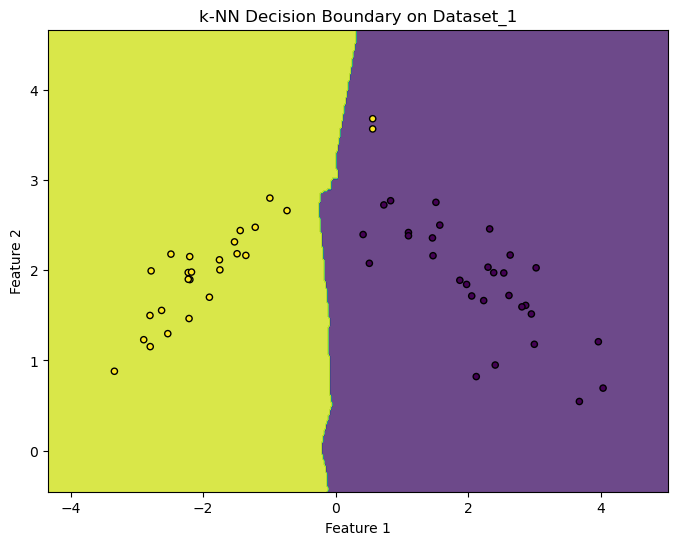

<Figure size 640x480 with 0 Axes>

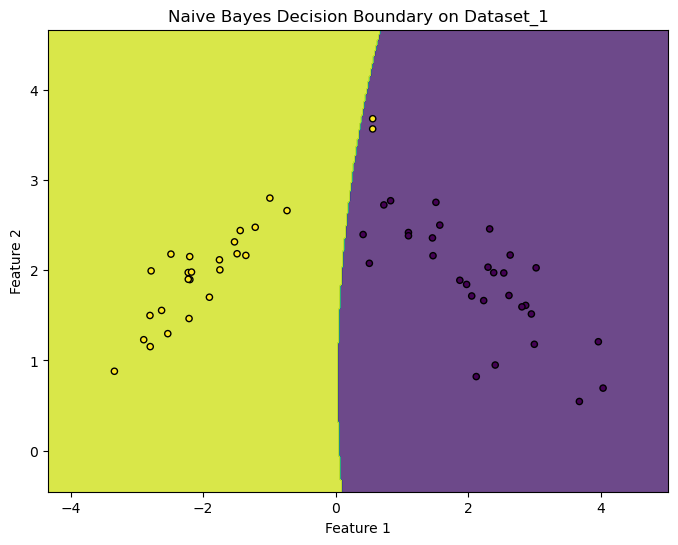

<Figure size 640x480 with 0 Axes>

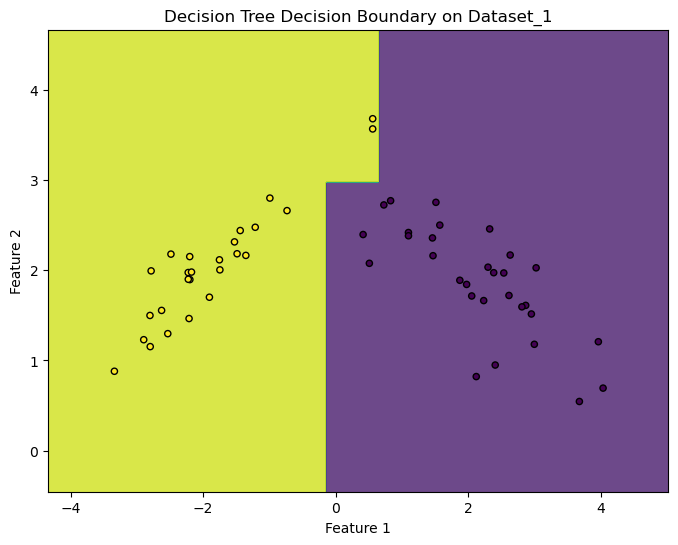

<Figure size 640x480 with 0 Axes>

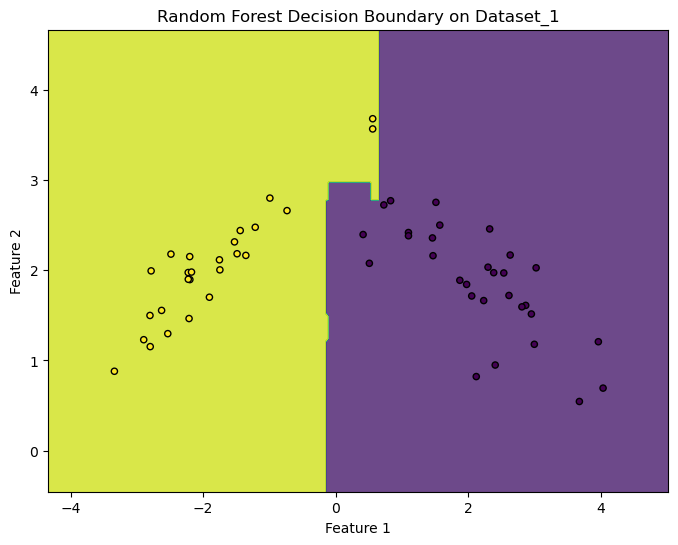

<Figure size 640x480 with 0 Axes>

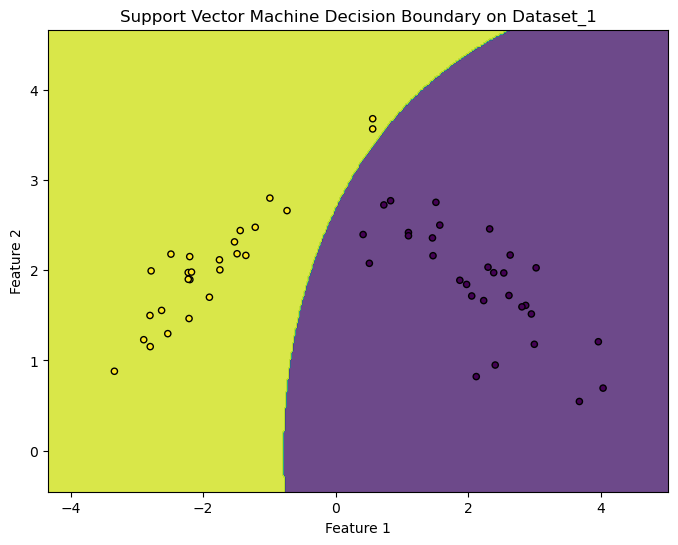

<Figure size 640x480 with 0 Axes>

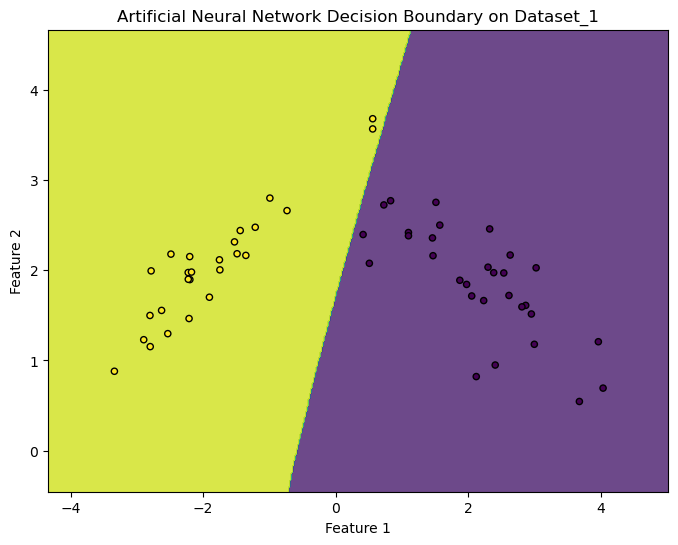

In [35]:
# Plot decision boundaries Dataset-1
for name, clf in classifiers.items():
    plt.figure()
    plot_decision_boundary(x_1_train.to_numpy(), y_1_train.to_numpy(), clf, f'{name} Decision Boundary on Dataset_1')
    plt.show()